## 1. Introduction
The project **aims to** predict property price based on certain features(e.g., square feet, number of bedroom, number of bathroom,location etc).

Here, we give some input as Area(Square Feet),BHK, Bath, Location and our model gives us the estimated price of the property.


## **Data Load :**
csv file through pandas dataframe **pd.read_csv()**




In [2]:
import pandas as pd
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## **2. Dataset Description**
- initially there is 8 features in our dataset.
- It is a regression problem, because **the nature of our output** is  continuous values. Precisely, we are predicting continuous numerical value. In other words, we are trying to estimate a relationship between input variables and a continuous target variable. Again, as type of our data(input features) is numerical and also we are trying to predict a numerical value, so regression is likely the right choice. On the other hand, for classification problem, the dataset (input feature) is categorical (more likely textual) or it is used to make a decision or assign a label. Noted that the boundary between regression and classification can be a bit blurry. For example, predicting the probability of an event occurring(a value between 0 and 1), it might seem like a regression problem. However, this can also be a binary classification problem, where it classifies instances into two classes based on a threshold (e.g. if the  probability is greater than 0.5, classify as class A; otherwise classify as class B).Finally, the choice between regression and classification depends on the nature of data, the addressing problem, and the type of output we need from our machine learning model.

- There are 13000 data points.

- Our dataset has both Quantitative features and Categorical features.




In [3]:
df=df.drop(['area_type','society','balcony','availability'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## **initial Heatmap including non-numeric data type:**

<ipython-input-4-6449cd710651>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(),cmap="YlGnBu", annot= True)


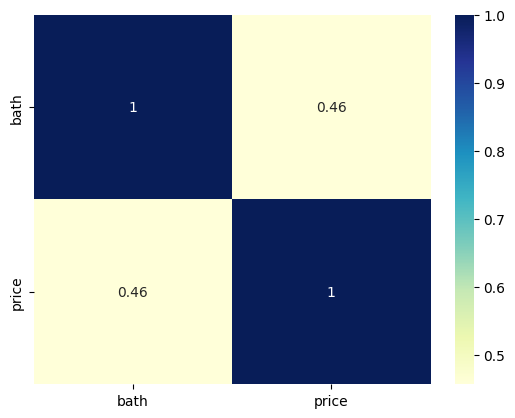

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn  as sb

dataplot = sb.heatmap(df.corr(),cmap="YlGnBu", annot= True)
plt.show()

# **Exploring features**

with histogram, boxplot and scatter plot we will visulaize our dataset and also try to find out imbalenced dataset.

## **Scatter Plot**
We are working with regression problem, however, imbalanced datasets are more commonly associated with calssification problems where there is a significant disparity in the number of instances amoung different classes. So, class imbalance doesn't direclty apply in the same way as it does for calssification and we can not represent our continious numerical value with bar chart as well. However, we can still encounter the distribution of our target variable(property price) for our regression model.  So, we can similarly plot scatter plot of our target variable in a linear regression context:

# Scatter plot function
### - using matplot library

## Scatter plot(bath vs price)

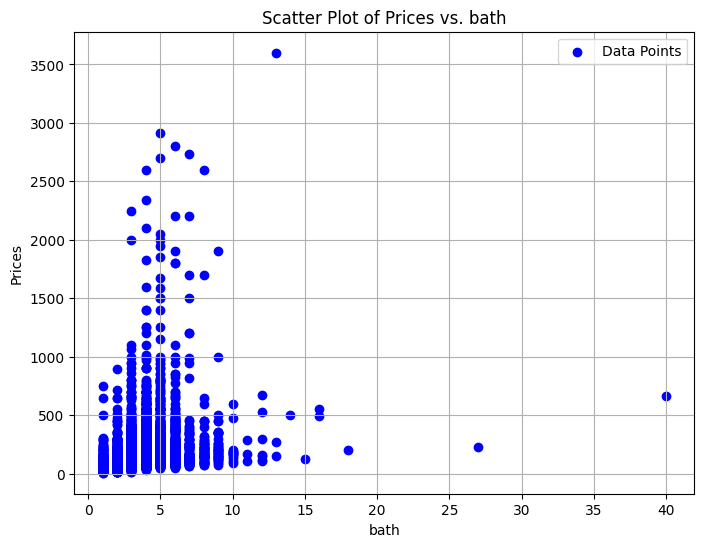

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bath'], df['price'], color='blue', marker='o', label='Data Points')
plt.title(f'Scatter Plot of Prices vs. bath')
plt.xlabel('bath')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

## **3. Data pre-processing:**
 a. First we will handle NULL values.

 b. Secondly we will handle Categorical values

In [6]:
# detecting Null values with isna()
df= df.copy()
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

## **Droping null values for location and size**
After exploring our dataset, we can see that there are very minimum number of null values for the features location(1) and size(16) . So removing this little values will not have significant impact on the accuracy of our model.

Finally, we can drop the samples of null values for location and size using `dropna()` function.

In [7]:
df1 = df.dropna(subset=['size', 'location'])
df1.isna().sum()

location       0
size           0
total_sqft     0
bath          57
price          0
dtype: int64

## Handling Null values for bath

###From the visualization above, we can see that as almost half of the sample(6908) has 2 bath, so we can set the null values for bath with the median of bath, which is 2.

In [8]:
# Filling null values with median(for the feature bath)
median_bath = 2

df1['bath']=df1['bath'].fillna(value=median_bath)


<ipython-input-8-fdc9afd92932>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bath']=df1['bath'].fillna(value=median_bath)


In [9]:
#checking again for null values
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Encoding categorical values(location)



In [10]:
df1.location = df1.location.apply(lambda x: x.strip())
location_stats = df1['location'].value_counts(ascending=False)
location_stats

<ipython-input-10-b2bd57530728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.location = df1.location.apply(lambda x: x.strip())


Whitefield                        540
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations.

`Dimensionality Reduction:`
Any location having less than 10 data points will be labeled as "other" location. This way number of categories can be reduced by huge amount.when we do one hot encoding, it will help us with having fewer dummy columns


In [11]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [12]:
df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1.location.unique())

<ipython-input-12-69c2440bc095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


242

In [13]:
# Using pandas
df2=df1.copy()
df2 = pd.get_dummies(df2,columns=['location'],drop_first=True) #To avoid dummy variable trap &  multicollinearity drop_first=True

**Multicollinearity:** occurs when two or more independent variablels are highly corelated. This can cause problem for regression analysis because it becomes difficult to distinguish the individiual effects of these correlated variables. By dropping one columns `(drop_first=True)` from the one-hot encoded variables, we can eliminate this correlation between them and reduce the multicollinearity issue.

**Example:** Let's say we have a categorical variable "Color" with three categories: "Red," "Green," and "Blue." After one-hot encoding, we will create three binary columns: "Color_Red," "Color_Green," and "Color_Blue." However, we only need two columns to represent this information because if "Color_Red" and "Color_Green" are both 0, then it's automatically understood that the color is "Blue." Including all three columns would lead to multicollinearity.


So far, we are done with handling null values and categorical values as well. So now we will move to `feature engineering`.

In [15]:
df3 = df2.copy()
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.drop(['size'],axis=1,inplace=True)

df3.head()

,total_sqft,bath,price,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,bhk
0,1056,2.0,39.07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2600,5.0,120.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1440,2.0,62.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,1521,3.0,95.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1200,2.0,51.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [16]:
#visualizing total_sqft
print(f'from total_sqft unique values are: \n{df3.total_sqft.unique()}\n\nlength of unique values in total_sqft: {len(df3.total_sqft.unique())}\n\nIndividual Quantity count:\n\n{df3.total_sqft.value_counts(ascending=False)}')


from total_sqft unique values are: 
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']

length of unique values in total_sqft: 2110

Individual Quantity count:

1200    843
1100    221
1500    204
2400    195
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2110, dtype: int64


In [17]:
# Creating a function which will convert range values to num  and also make it a float
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None
df3['total_sqft']= df3['total_sqft'].apply(convert_sqft_to_num)


In [18]:
df3.head()

,total_sqft,bath,price,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,bhk
0,1056.0,2.0,39.07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2600.0,5.0,120.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1440.0,2.0,62.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,1521.0,3.0,95.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1200.0,2.0,51.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Adding new feature (price per square fit )

In [19]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']


In [20]:
df3.head()

,total_sqft,bath,price,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,bhk,price_per_sqft
0,1056.0,2.0,39.07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3699.810606
1,2600.0,5.0,120.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4615.384615
2,1440.0,2.0,62.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4305.555556
3,1521.0,3.0,95.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,6245.890861
4,1200.0,2.0,51.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4250.000000


## Now lets compute the stadard daviation of our features.

`The standard deviation is the square root of the average of the squared deviations from the mean, i.e., std = sqrt(mean(x)), where x = abs(a - a.mean())**2`

In [22]:
import numpy as np
ind_var= ['bath',	'price','price_per_sqft','bhk','total_sqft']
for i in ind_var:
  print(f'{i} = {np.std(df3[i])}')


bath = 1.339342641241205
price = 148.98822005411284
price_per_sqft = 106493.58360643168
bhk = 1.2949730511222934
total_sqft = 1238.4322240450483


In [23]:
df3.price_per_sqft.describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [24]:
df4=df3.dropna()
df4.isna().sum()

total_sqft                            0
bath                                  0
price                                 0
location_1st Phase JP Nagar           0
location_2nd Phase Judicial Layout    0
                                     ..
location_Yelenahalli                  0
location_Yeshwanthpur                 0
location_other                        0
bhk                                   0
price_per_sqft                        0
Length: 246, dtype: int64

In [25]:
# Splitting our dataset
from sklearn.model_selection import train_test_split
X= df4.drop(['price'],axis=1)
y= df4.price

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=10)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9279, 245), (3978, 245), (9279,), (3978,))

# Model Builiding
We are working with only three models. Initially we thought linear regression should be the best model for our scenario.. But After some trial and error we came to know that `XGBRegressor` is the best model for our project.

1. Linear Regression
2. Decision Tree Regressor
3. XGB Regressor

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [33]:
lr.score(X_test,y_test)
score_lr = lr.score(X_test,y_test)
print(f'score from linear regression : {score_lr}')

score of linear regression : 0.4317984488734766


In [28]:
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)
score_dtr = dtr.score(X_test,y_test)
print(f'score from decision tree regressor: {score_dtr}')

score from decision tree regressor: 0.9469525388971177


In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


xgb_model = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size for updates
    max_depth=3,  # Maximum depth of each tree
    objective='reg:squarederror'  # Specify the regression objective
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 657.895264832519


In [35]:
score_xgb = xgb_model.score(X_test,y_test)
print(f'score of XGB Regressior: {score_xgb}')

score of XGB Regressior: 0.9753258868622339


# Comparison

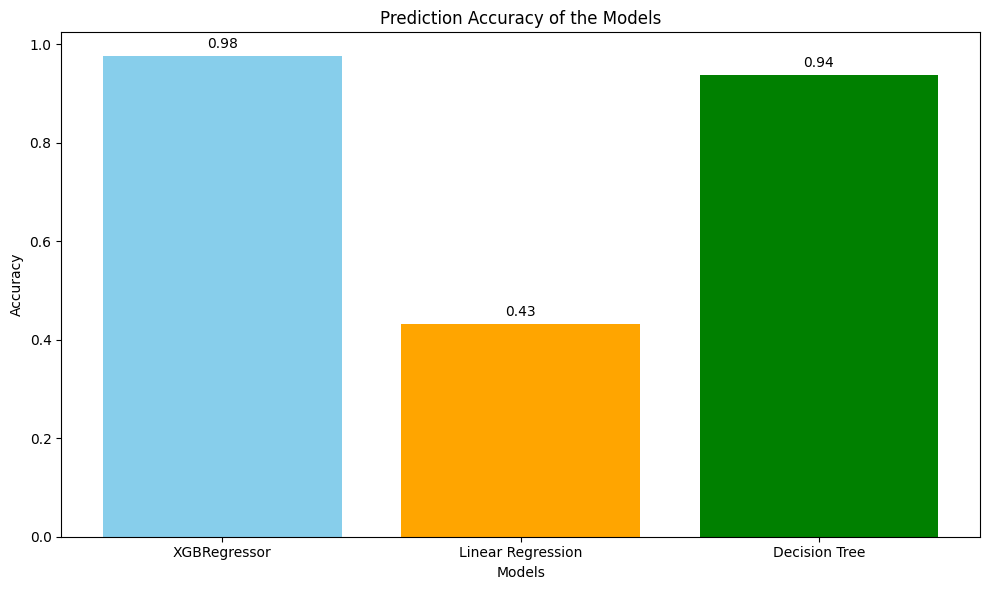

In [32]:
import matplotlib.pyplot as plt


model_names = ['XGBRegressor', 'Linear Regression', 'Decision Tree']
accuracy_scores = [score_xgb, score_lr, score_dtr]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'orange', 'green'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of the Models')

# Show the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', color='black')

# Display the plot
plt.tight_layout()
plt.show()


## **So the best model for our scenario is XGB Regressor with the score of 98%**